In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from itertools import combinations

In [3]:
import requests
import urllib
from bs4 import BeautifulSoup
import re
import io
import gzip
import time
import csv
import os
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from webdriver_manager.chrome import ChromeDriverManager
from multiprocessing import Pool
import import_ipynb
import pandas as pd
from ipynb.fs.full.scrape_daily import scrape_daily

driver = webdriver.Chrome(ChromeDriverManager().install())
url = "https://en.wikipedia.org/wiki/List_of_S%26P_500_companies"
driver.get(url)

symbols = list()
symbols_GICC = dict()

table = "/html/body/div[3]/div[3]/div[5]/div[1]/table[1]"
table = driver.find_element_by_xpath(table)
elements = table.find_elements_by_tag_name("tr")[1:]

for row in elements:
    data = [data.text for data in row.find_elements_by_tag_name("td")]
    symbols.append(data[0])
    symbols_GICC[data[0]] = data[3]

print(len(symbols_GICC))



====== WebDriver manager ======
Current google-chrome version is 91.0.4472
Get LATEST driver version for 91.0.4472
Get LATEST driver version for 91.0.4472
Trying to download new driver from https://chromedriver.storage.googleapis.com/91.0.4472.19/chromedriver_win32.zip
Driver has been saved in cache [C:\Users\shiri\.wdm\drivers\chromedriver\win32\91.0.4472.19]


505


In [4]:
top_gain_loss_daily = pd.DataFrame(columns=["symbol","gain_loss","GICS"])
top_gain_loss_weekly = pd.DataFrame(columns=["symbol","gain_loss","GICS"])
top_gain_loss_monthly = pd.DataFrame(columns=["symbol","gain_loss","GICS"])

In [5]:
daily_dfs = {}
weekly_dfs = {}
monthly_dfs = {}


def gain_loss(sym):
    df_daily = pd.read_csv(sym +"_daily" + ".csv")
    df_daily["Gain/Loss"] = (df_daily["Close"] - df_daily["Close"].shift(1)) / df_daily["Close"]
    daily_dfs[sym] = df_daily
    print(daily_dfs[sym])

    df_weekly = pd.read_csv(sym +"_weekly"+".csv")
    df_weekly["Gain/Loss"] = (df_weekly["Close"] - df_weekly["Close"].shift(1)) / df_weekly["Close"]
    weekly_dfs[sym] = df_weekly

    df_monthly = pd.read_csv(sym + "_monthly" + ".csv")
    df_monthly["Gain/Loss"] = (df_monthly["Close"] - df_monthly["Close"].shift(1)) / df_weekly["Close"]
    monthly_dfs[sym] = df_monthly
    
    daily = {"symbol":sym,"gain_loss":df_daily["Gain/Loss"].sum(),"GICS":symbols_GICC[sym]}
    weekly = {"symbol":sym,"gain_loss":df_weekly["Gain/Loss"].sum(),"GICS":symbols_GICC[sym]}
    monthly = {"symbol":sym,"gain_loss":df_monthly["Gain/Loss"].sum(),"GICS":symbols_GICC[sym]}
    return (daily,weekly,monthly)

In [6]:
for n in symbols:
    try:
        (daily,weekly,monthly) = gain_loss(n)
        top_gain_loss_daily = top_gain_loss_daily.append(daily, ignore_index=True)
        top_gain_loss_weekly = top_gain_loss_weekly.append(weekly, ignore_index=True)
        top_gain_loss_monthly = top_gain_loss_monthly.append(monthly, ignore_index=True)
    except Exception as e :
        pass

      Unnamed: 0        Date       Open       High        Low      Close  \
0              0  2016-01-04  27.110001  27.250000  26.080000  26.430000   
1              1  2016-01-05  26.610001  26.860001  25.940001  26.120001   
2              2  2016-01-06  25.830000  26.660000  25.770000  26.410000   
3              3  2016-01-07  25.799999  26.469999  25.600000  25.690001   
4              4  2016-01-08  25.969999  26.160000  25.670000  25.750000   
...          ...         ...        ...        ...        ...        ...   
1254        1254  2020-12-24  51.230000  51.240002  49.939999  50.119999   
1255        1255  2020-12-28  50.500000  50.549999  49.930000  50.240002   
1256        1256  2020-12-29  50.650002  51.110001  50.299999  50.860001   
1257        1257  2020-12-30  51.020000  51.509998  50.470001  50.549999   
1258        1258  2020-12-31  50.610001  50.810001  50.000000  50.250000   

      Adj Close    Volume  Gain/Loss  
0     25.509241  19107600        NaN  
1     25.

      Unnamed: 0        Date       Open       High        Low      Close  \
0              0  2016-01-04  34.244080  34.845173  34.034607  34.817852   
1              1  2016-01-05  34.845173  35.746811  34.799637  35.573769   
2              2  2016-01-06  34.735882  35.091076  33.870674  34.143898   
3              3  2016-01-07  33.515484  33.934425  33.078323  33.233150   
4              4  2016-01-08  33.333332  33.697632  33.078323  33.142078   
...          ...         ...        ...        ...        ...        ...   
1254        1254  2020-12-24  29.570000  29.830000  29.350000  29.760000   
1255        1255  2020-12-28  29.820000  29.930000  29.549999  29.920000   
1256        1256  2020-12-29  30.040001  30.139999  29.570000  29.760000   
1257        1257  2020-12-30  29.850000  30.270000  29.700001  29.860001   
1258        1258  2020-12-31  29.860001  30.270000  29.490000  30.230000   

      Adj Close    Volume  Gain/Loss  
0     26.174614   3983873        NaN  
1     26.

      Unnamed: 0        Date        Open        High         Low       Close  \
0              0  2016-01-04   92.680000   92.680000   89.910004   91.059998   
1              1  2016-01-05   91.080002   91.500000   89.129997   89.730003   
2              2  2016-01-06   87.919998   88.669998   86.910004   87.519997   
3              3  2016-01-07   85.330002   85.989998   84.510002   84.730003   
4              4  2016-01-08   85.180000   85.489998   83.830002   84.019997   
...          ...         ...         ...         ...         ...         ...   
1254        1254  2020-12-24  202.179993  202.970001  201.070007  202.440002   
1255        1255  2020-12-28  204.360001  205.300003  201.860001  202.380005   
1256        1256  2020-12-29  203.570007  203.649994  198.820007  200.410004   
1257        1257  2020-12-30  200.009995  202.720001  199.889999  202.169998   
1258        1258  2020-12-31  201.779999  203.960007  201.190002  203.880005   

       Adj Close   Volume  Gain/Loss  


      Unnamed: 0        Date        Open        High         Low       Close  \
0              0  2016-01-04  121.860001  123.360001  121.730003  122.889999   
1              1  2016-01-05  123.160004  123.989998  121.559998  122.000000   
2              2  2016-01-06  120.790001  122.309998  120.000000  120.839996   
3              3  2016-01-07  119.040001  120.489998  118.129997  118.589996   
4              4  2016-01-08  119.050003  120.660004  116.139999  116.250000   
...          ...         ...         ...         ...         ...         ...   
1254        1254  2020-12-24  205.000000  205.000000  202.740005  203.869995   
1255        1255  2020-12-28  205.389999  206.300003  201.470001  202.520004   
1256        1256  2020-12-29  202.970001  203.759995  200.820007  202.199997   
1257        1257  2020-12-30  202.509995  203.500000  200.990005  201.509995   
1258        1258  2020-12-31  201.149994  203.729996  200.460007  203.550003   

       Adj Close   Volume  Gain/Loss  


      Unnamed: 0        Date       Open       High        Low      Close  \
0              0  2016-01-04  37.750000  37.820000  37.150002  37.779999   
1              1  2016-01-05  37.759998  38.009998  37.700001  37.889999   
2              2  2016-01-06  37.279999  37.410000  36.790001  37.049999   
3              3  2016-01-07  36.320000  36.820000  36.130001  36.160000   
4              4  2016-01-08  36.360001  36.529999  35.860001  35.900002   
...          ...         ...        ...        ...        ...        ...   
1254        1254  2020-12-24  44.110001  44.240002  43.740002  44.000000   
1255        1255  2020-12-28  44.299999  44.930000  44.200001  44.419998   
1256        1256  2020-12-29  44.630001  44.939999  43.980000  44.060001   
1257        1257  2020-12-30  44.049999  44.740002  43.930000  44.419998   
1258        1258  2020-12-31  44.290001  45.119999  44.270000  45.020000   

      Adj Close   Volume  Gain/Loss  
0     36.650410  1629400        NaN  
1     36.75

      Unnamed: 0        Date        Open        High         Low       Close  \
0              0  2016-01-04   34.200001   34.200001   33.139999   33.730000   
1              1  2016-01-05   33.740002   33.990002   33.560001   33.660000   
2              2  2016-01-06   33.250000   33.840000   32.770000   33.070000   
3              3  2016-01-07   32.560001   32.880001   31.540001   31.770000   
4              4  2016-01-08   31.940001   32.180000   31.299999   31.360001   
...          ...         ...         ...         ...         ...         ...   
1254        1254  2020-12-24  119.820000  120.180000  119.040001  119.849998   
1255        1255  2020-12-28  121.360001  121.750000  118.000000  118.809998   
1256        1256  2020-12-29  118.800003  118.940002  116.980003  117.769997   
1257        1257  2020-12-30  118.760002  120.160004  118.300003  119.510002   
1258        1258  2020-12-31  119.599998  120.269997  118.709999  119.610001   

       Adj Close  Volume  Gain/Loss  
0

      Unnamed: 0        Date        Open        High         Low       Close  \
0              0  2016-01-04   70.199997   70.949997   69.790001   70.760002   
1              1  2016-01-05   70.790001   71.750000   70.370003   70.779999   
2              2  2016-01-06   70.000000   70.510002   69.080002   69.680000   
3              3  2016-01-07   68.720001   69.250000   67.820000   68.150002   
4              4  2016-01-08   67.989998   69.190002   67.339996   67.419998   
...          ...         ...         ...         ...         ...         ...   
1254        1254  2020-12-24  121.029999  121.639999  119.639999  120.230003   
1255        1255  2020-12-28  121.320000  121.410004  118.199997  118.500000   
1256        1256  2020-12-29  118.970001  118.989998  117.070000  118.400002   
1257        1257  2020-12-30  119.099998  120.160004  117.830002  118.330002   
1258        1258  2020-12-31  118.029999  119.330002  117.260002  119.169998   

       Adj Close   Volume  Gain/Loss  


      Unnamed: 0        Date        Open        High         Low       Close  \
0              0  2016-01-04  192.309998  192.899994  190.279999  192.339996   
1              1  2016-01-05  193.000000  196.759995  192.630005  196.169998   
2              2  2016-01-06  194.690002  196.520004  194.669998  195.690002   
3              3  2016-01-07  192.919998  193.839996  191.389999  191.559998   
4              4  2016-01-08  191.750000  192.850006  185.600006  186.100006   
...          ...         ...         ...         ...         ...         ...   
1254        1254  2020-12-24   84.000000   84.589996   83.050003   84.370003   
1255        1255  2020-12-28   84.529999   86.150002   84.510002   85.480003   
1256        1256  2020-12-29   85.790001   86.570000   82.940002   83.290001   
1257        1257  2020-12-30   83.209999   85.550003   83.209999   83.970001   
1258        1258  2020-12-31   83.519997   85.349998   82.360001   85.279999   

       Adj Close   Volume  Gain/Loss  


      Unnamed: 0        Date        Open        High         Low       Close  \
0              0  2016-01-04   58.770000   58.830002   57.599998   58.259998   
1              1  2016-01-05   58.790001   58.790001   57.980000   58.650002   
2              2  2016-01-06   57.700001   58.529999   57.639999   58.130001   
3              3  2016-01-07   56.880001   57.910000   56.160000   56.689999   
4              4  2016-01-08   57.410000   57.730000   56.529999   56.630001   
...          ...         ...         ...         ...         ...         ...   
1254        1254  2020-12-24  102.300003  102.360001  101.680000  102.010002   
1255        1255  2020-12-28  102.919998  104.379997  102.309998  104.339996   
1256        1256  2020-12-29  104.889999  105.779999  104.470001  105.629997   
1257        1257  2020-12-30  105.989998  106.620003  105.779999  105.970001   
1258        1258  2020-12-31  106.000000  107.139999  105.620003  106.980003   

       Adj Close    Volume  Gain/Loss  

      Unnamed: 0        Date        Open        High         Low       Close  \
0              0  2016-01-04   69.930000   70.209999   69.169998   70.190002   
1              1  2016-01-05   70.389999   70.809998   69.500000   70.480003   
2              2  2016-01-06   69.139999   69.410004   68.620003   68.900002   
3              3  2016-01-07   67.510002   68.760002   66.669998   67.059998   
4              4  2016-01-08   67.459999   67.650002   65.279999   65.360001   
...          ...         ...         ...         ...         ...         ...   
1254        1254  2020-12-24  148.869995  148.869995  147.229996  148.279999   
1255        1255  2020-12-28  148.910004  149.839996  147.949997  148.059998   
1256        1256  2020-12-29  148.979996  151.830002  147.490005  148.380005   
1257        1257  2020-12-30  148.899994  150.850006  148.750000  149.580002   
1258        1258  2020-12-31  149.610001  151.539993  148.949997  151.389999   

       Adj Close   Volume  Gain/Loss  


      Unnamed: 0        Date        Open        High         Low       Close  \
0              0  2016-01-04  139.449997  140.149994  137.320007  138.750000   
1              1  2016-01-05  139.000000  140.940002  138.369995  138.509995   
2              2  2016-01-06  136.550003  138.449997  136.550003  137.449997   
3              3  2016-01-07  135.000000  135.259995  133.139999  134.309998   
4              4  2016-01-08  135.600006  137.009995  133.820007  134.160004   
...          ...         ...         ...         ...         ...         ...   
1254        1254  2020-12-24  457.399994  462.209991  456.410004  458.089996   
1255        1255  2020-12-28  462.079987  463.500000  457.350006  460.730011   
1256        1256  2020-12-29  466.000000  466.329987  460.750000  462.859985   
1257        1257  2020-12-30  465.320007  466.600006  461.480011  461.730011   
1258        1258  2020-12-31  461.570007  466.230011  459.529999  465.779999   

       Adj Close   Volume  Gain/Loss  


      Unnamed: 0        Date       Open       High        Low      Close  \
0              0  2016-01-04  21.160000  21.600000  20.959999  21.590000   
1              1  2016-01-05  21.590000  21.650000  20.990000  21.230000   
2              2  2016-01-06  20.950001  21.049999  20.570000  20.780001   
3              3  2016-01-07  20.389999  20.480000  19.670000  19.790001   
4              4  2016-01-08  19.879999  20.070000  19.420000  19.430000   
...          ...         ...        ...        ...        ...        ...   
1254        1254  2020-12-24  66.879997  66.879997  66.120003  66.650002   
1255        1255  2020-12-28  67.589996  67.860001  66.400002  66.430000   
1256        1256  2020-12-29  67.199997  67.930000  65.519997  65.769997   
1257        1257  2020-12-30  66.230003  67.230003  66.139999  66.330002   
1258        1258  2020-12-31  66.510002  67.269997  65.930000  66.769997   

      Adj Close   Volume  Gain/Loss  
0     21.590000  1813700        NaN  
1     21.23

      Unnamed: 0        Date       Open       High        Low      Close  \
0              0  2016-01-04  56.000000  56.799999  55.509998  56.740002   
1              1  2016-01-05  56.799999  58.029999  56.660000  57.740002   
2              2  2016-01-06  57.669998  57.779999  56.730000  57.209999   
3              3  2016-01-07  56.630001  57.080002  56.009998  56.209999   
4              4  2016-01-08  56.380001  56.840000  56.009998  56.259998   
...          ...         ...        ...        ...        ...        ...   
1254        1254  2020-12-24  49.209999  49.540001  48.849998  49.189999   
1255        1255  2020-12-28  49.320000  49.360001  48.599998  49.360001   
1256        1256  2020-12-29  49.410000  49.730000  48.750000  49.029999   
1257        1257  2020-12-30  48.990002  49.830002  48.570000  48.860001   
1258        1258  2020-12-31  48.419998  49.080002  47.799999  49.040001   

      Adj Close   Volume  Gain/Loss  
0     43.329063  2820900        NaN  
1     44.09

In [7]:
print(top_gain_loss_daily)
print(top_gain_loss_weekly)
print(top_gain_loss_monthly)


   symbol  gain_loss                    GICS
0    EBAY   0.429091  Consumer Discretionary
1     ECL   0.481382               Materials
2     EIX  -0.170670               Utilities
3      EW   0.969252             Health Care
4      EA   0.520431  Communication Services
5     EMR   0.285292             Industrials
6     LKQ  -0.152681  Consumer Discretionary
7     LMT   0.359774             Industrials
8       L  -0.059483              Financials
9     PGR   1.010607              Financials
10    PLD   0.679210             Real Estate
11    PRU  -0.380816              Financials
12    PTC   0.969237  Information Technology
13    PEG   0.274897               Utilities
14    PSA  -0.195083             Real Estate
15    PHM   0.563486  Consumer Discretionary
16    PVH  -0.361834  Consumer Discretionary
17   QRVO   0.740016  Information Technology
18    PWR   1.020624             Industrials
19   QCOM   0.778858  Information Technology
20     SO   0.115423               Utilities
21    LUV 

In [8]:
top_gain_loss_daily = top_gain_loss_daily.sort_values(by=["gain_loss"])
top_25_daily = top_gain_loss_daily.head(25)
loss_25_daily = top_gain_loss_daily.tail(25)
top_25_daily_names = list(top_25_daily["symbol"])
loss_25_daily_names = list(loss_25_daily["symbol"])
names = set(loss_25_daily_names+top_25_daily_names)
samp = pd.DataFrame(columns=names,index=names)
for n1,n2 in combinations(names,2):
    df1 = daily_dfs[n1]
    df2 = daily_dfs[n2]
    samp.loc[n1,n2] = df1["Gain/Loss"].corr(df2["Gain/Loss"])
    samp.loc[n2,n1] = df2["Gain/Loss"].corr(df1["Gain/Loss"])
    samp.loc[n1,n1] = 1
    samp.loc[n2,n2] = 1
daily_samp = samp.astype({name:"float" for name in names})
daily_samp.style.background_gradient(cmap="brg")

,QRVO,LUV,PGR,SWK,VLO,SYF,PVH,V,TTWO,SO,ZTS,VTRS,STE,EBAY,SIVB,URI,PWR,SBUX,LKQ,VNO,PSA,ECL,L,PRU,QCOM,UNM,PHM,SNPS,TROW,UPS,SYY,STT,TMUS,LMT,EW,UHS,EMR,PEG,EIX,PLD,SYK,PTC,EA,VTR
QRVO,1.000000,0.349855,0.306409,0.530670,0.408045,0.439580,0.397589,0.567005,0.368932,0.255812,0.456581,0.283609,0.461454,0.405860,0.486761,0.489977,0.464763,0.411622,0.455144,0.326571,0.195389,0.447987,0.450100,0.484380,0.581849,0.449661,0.404027,0.565740,0.501623,0.404701,0.344244,0.512767,0.402302,0.335295,0.399414,0.376527,0.470831,0.279379,0.266124,0.377032,0.411674,0.449713,0.349306,0.292245
LUV,0.349855,1.000000,0.355213,0.509817,0.474118,0.545379,0.522564,0.469677,0.181085,0.303193,0.379647,0.336278,0.394141,0.220690,0.466925,0.483707,0.469472,0.441002,0.464999,0.506689,0.247869,0.430941,0.516360,0.603941,0.333907,0.597734,0.397071,0.322364,0.476128,0.368385,0.478828,0.513924,0.304781,0.417627,0.322934,0.403515,0.468932,0.344941,0.298516,0.403533,0.421145,0.390552,0.196976,0.446334
PGR,0.306409,0.355213,1.000000,0.435024,0.328596,0.400868,0.293775,0.470783,0.281481,0.367912,0.480819,0.295251,0.474042,0.280311,0.404794,0.323164,0.405584,0.393012,0.328118,0.286956,0.349076,0.442128,0.476537,0.475534,0.354409,0.453948,0.371961,0.446246,0.522032,0.409102,0.312754,0.397493,0.351675,0.463640,0.338363,0.315144,0.415462,0.368482,0.329169,0.473390,0.397902,0.315157,0.290735,0.267074
SWK,0.530670,0.509817,0.435024,1.000000,0.582136,0.646787,0.629540,0.654848,0.280547,0.386407,0.555031,0.347216,0.547324,0.379243,0.608058,0.642910,0.635776,0.567296,0.659543,0.549099,0.356718,0.635106,0.647499,0.682965,0.490927,0.644140,0.600438,0.537877,0.599457,0.469601,0.548096,0.653825,0.434368,0.497064,0.436935,0.563421,0.694158,0.450386,0.397462,0.505034,0.581669,0.486346,0.267769,0.489176
VLO,0.408045,0.474118,0.328596,0.582136,1.000000,0.585305,0.605642,0.590328,0.169994,0.353023,0.435086,0.329022,0.460216,0.252432,0.515112,0.536868,0.496734,0.491071,0.557828,0.546298,0.252275,0.540470,0.616784,0.650188,0.377830,0.621753,0.453896,0.373388,0.534066,0.341897,0.599186,0.600679,0.347793,0.415769,0.356655,0.540012,0.610727,0.396046,0.348585,0.371341,0.552291,0.401047,0.194206,0.517874
SYF,0.439580,0.545379,0.400868,0.646787,0.585305,1.000000,0.629032,0.599730,0.196501,0.376873,0.479725,0.349116,0.491895,0.274195,0.645696,0.569463,0.579072,0.550325,0.641891,0.644107,0.337516,0.557176,0.668070,0.710380,0.410481,0.685413,0.566185,0.419218,0.579735,0.379821,0.642993,0.657758,0.405501,0.456716,0.359334,0.585391,0.618354,0.444711,0.374141,0.478162,0.537556,0.401867,0.211981,0.562684
PVH,0.397589,0.522564,0.293775,0.629540,0.605642,0.629032,1.000000,0.554139,0.126143,0.350509,0.389593,0.342888,0.446241,0.239003,0.545252,0.568455,0.558782,0.503606,0.619229,0.610117,0.273232,0.534066,0.637304,0.684620,0.358216,0.644096,0.523169,0.360770,0.514579,0.351675,0.588928,0.607282,0.304134,0.409426,0.341162,0.532725,0.614101,0.423594,0.367951,0.424530,0.526109,0.396592,0.155437,0.553764
V,0.567005,0.469677,0.470783,0.654848,0.590328,0.599730,0.554139,1.000000,0.417044,0.437262,0.651239,0.335077,0.614449,0.433900,0.564435,0.549757,0.530782,0.641046,0.559903,0.525920,0.393527,0.675861,0.629125,0.639134,0.521835,0.564845,0.520957,0.695781,0.648967,0.478743,0.528827,0.593732,0.505770,0.542789,0.557417,0.530722,0.621894,0.448860,0.363846,0.572446,0.682155,0.578537,0.379310,0.464008
TTWO,0.368932,0.181085,0.281481,0.280547,0.169994,0.196501,0.126143,0.417044,1.000000,0.156349,0.379750,0.167030,0.337305,0.339110,0.223506,0.259849,0.219801,0.275372,0.162582,0.132859,0.199224,0.265551,0.216743,0.185424,0.366231,0.161207,0.217984,0.489146,0.313014,0.280861,0.161999,0.225040,0.370226,0.244087,0.312923,0.188671,0.219318,0.165521,0.122486,0.295279,0.288188,0.372143,0.637583,0.149715
SO,0.255812,0.303193,0.367912,0.386407,0.353023,0.376873,0.350509,0.437262,0.156349,1.000000,0.428922,0.117836,0.467834,0.199869,0.269839,0.212697,0.302587,0.417972,0.340833,0.481934,0.522258,0.508005,0.497434,0.441252,0

In [9]:
top_gain_loss_weekly = top_gain_loss_weekly.sort_values(by=["gain_loss"])
top_25_daily = top_gain_loss_weekly.head(25)
loss_25_daily = top_gain_loss_weekly.tail(25)
top_25_daily_names = list(top_25_daily["symbol"])
loss_25_daily_names = list(loss_25_daily["symbol"])
names = set(loss_25_daily_names+top_25_daily_names)
samp = pd.DataFrame(columns=names,index=names)
for n1,n2 in combinations(names,2):
    df1 = daily_dfs[n1]
    df2 = daily_dfs[n2]
    samp.loc[n1,n2] = df1["Gain/Loss"].corr(df2["Gain/Loss"])
    samp.loc[n2,n1] = df2["Gain/Loss"].corr(df1["Gain/Loss"])
    samp.loc[n1,n1] = 1
    samp.loc[n2,n2] = 1
weekly_samp = samp.astype({name:"float" for name in names})
weekly_samp.style.background_gradient(cmap="brg")

,QRVO,LUV,PGR,SWK,VLO,SYF,PVH,V,TTWO,SO,ZTS,VTRS,STE,EBAY,SIVB,URI,PWR,SBUX,LKQ,VNO,PSA,ECL,L,PRU,QCOM,UNM,PHM,SNPS,UPS,TROW,UHS,STT,EMR,LMT,EW,TMUS,SYY,PEG,EIX,PLD,SYK,PTC,EA,VTR
QRVO,1.000000,0.349855,0.306409,0.530670,0.408045,0.439580,0.397589,0.567005,0.368932,0.255812,0.456581,0.283609,0.461454,0.405860,0.486761,0.489977,0.464763,0.411622,0.455144,0.326571,0.195389,0.447987,0.450100,0.484380,0.581849,0.449661,0.404027,0.565740,0.404701,0.501623,0.376527,0.512767,0.470831,0.335295,0.399414,0.402302,0.344244,0.279379,0.266124,0.377032,0.411674,0.449713,0.349306,0.292245
LUV,0.349855,1.000000,0.355213,0.509817,0.474118,0.545379,0.522564,0.469677,0.181085,0.303193,0.379647,0.336278,0.394141,0.220690,0.466925,0.483707,0.469472,0.441002,0.464999,0.506689,0.247869,0.430941,0.516360,0.603941,0.333907,0.597734,0.397071,0.322364,0.368385,0.476128,0.403515,0.513924,0.468932,0.417627,0.322934,0.304781,0.478828,0.344941,0.298516,0.403533,0.421145,0.390552,0.196976,0.446334
PGR,0.306409,0.355213,1.000000,0.435024,0.328596,0.400868,0.293775,0.470783,0.281481,0.367912,0.480819,0.295251,0.474042,0.280311,0.404794,0.323164,0.405584,0.393012,0.328118,0.286956,0.349076,0.442128,0.476537,0.475534,0.354409,0.453948,0.371961,0.446246,0.409102,0.522032,0.315144,0.397493,0.415462,0.463640,0.338363,0.351675,0.312754,0.368482,0.329169,0.473390,0.397902,0.315157,0.290735,0.267074
SWK,0.530670,0.509817,0.435024,1.000000,0.582136,0.646787,0.629540,0.654848,0.280547,0.386407,0.555031,0.347216,0.547324,0.379243,0.608058,0.642910,0.635776,0.567296,0.659543,0.549099,0.356718,0.635106,0.647499,0.682965,0.490927,0.644140,0.600438,0.537877,0.469601,0.599457,0.563421,0.653825,0.694158,0.497064,0.436935,0.434368,0.548096,0.450386,0.397462,0.505034,0.581669,0.486346,0.267769,0.489176
VLO,0.408045,0.474118,0.328596,0.582136,1.000000,0.585305,0.605642,0.590328,0.169994,0.353023,0.435086,0.329022,0.460216,0.252432,0.515112,0.536868,0.496734,0.491071,0.557828,0.546298,0.252275,0.540470,0.616784,0.650188,0.377830,0.621753,0.453896,0.373388,0.341897,0.534066,0.540012,0.600679,0.610727,0.415769,0.356655,0.347793,0.599186,0.396046,0.348585,0.371341,0.552291,0.401047,0.194206,0.517874
SYF,0.439580,0.545379,0.400868,0.646787,0.585305,1.000000,0.629032,0.599730,0.196501,0.376873,0.479725,0.349116,0.491895,0.274195,0.645696,0.569463,0.579072,0.550325,0.641891,0.644107,0.337516,0.557176,0.668070,0.710380,0.410481,0.685413,0.566185,0.419218,0.379821,0.579735,0.585391,0.657758,0.618354,0.456716,0.359334,0.405501,0.642993,0.444711,0.374141,0.478162,0.537556,0.401867,0.211981,0.562684
PVH,0.397589,0.522564,0.293775,0.629540,0.605642,0.629032,1.000000,0.554139,0.126143,0.350509,0.389593,0.342888,0.446241,0.239003,0.545252,0.568455,0.558782,0.503606,0.619229,0.610117,0.273232,0.534066,0.637304,0.684620,0.358216,0.644096,0.523169,0.360770,0.351675,0.514579,0.532725,0.607282,0.614101,0.409426,0.341162,0.304134,0.588928,0.423594,0.367951,0.424530,0.526109,0.396592,0.155437,0.553764
V,0.567005,0.469677,0.470783,0.654848,0.590328,0.599730,0.554139,1.000000,0.417044,0.437262,0.651239,0.335077,0.614449,0.433900,0.564435,0.549757,0.530782,0.641046,0.559903,0.525920,0.393527,0.675861,0.629125,0.639134,0.521835,0.564845,0.520957,0.695781,0.478743,0.648967,0.530722,0.593732,0.621894,0.542789,0.557417,0.505770,0.528827,0.448860,0.363846,0.572446,0.682155,0.578537,0.379310,0.464008
TTWO,0.368932,0.181085,0.281481,0.280547,0.169994,0.196501,0.126143,0.417044,1.000000,0.156349,0.379750,0.167030,0.337305,0.339110,0.223506,0.259849,0.219801,0.275372,0.162582,0.132859,0.199224,0.265551,0.216743,0.185424,0.366231,0.161207,0.217984,0.489146,0.280861,0.313014,0.188671,0.225040,0.219318,0.244087,0.312923,0.370226,0.161999,0.165521,0.122486,0.295279,0.288188,0.372143,0.637583,0.149715
SO,0.255812,0.303193,0.367912,0.386407,0.353023,0.376873,0.350509,0.437262,0.156349,1.000000,0.428922,0.117836,0.467834,0.199869,0.269839,0.212697,0.302587,0.417972,0.340833,0.481934,0.522258,0.508005,0.497434,0.441252,0

In [10]:
top_gain_loss_monthly = top_gain_loss_monthly.sort_values(by=["gain_loss"])
top_25_daily = top_gain_loss_monthly.head(25)
loss_25_daily = top_gain_loss_monthly.tail(25)
top_25_daily_names = list(top_25_daily["symbol"])
loss_25_daily_names = list(loss_25_daily["symbol"])
names = set(loss_25_daily_names+top_25_daily_names)
samp = pd.DataFrame(columns=names,index=names)
for n1,n2 in combinations(names,2):
    df1 = daily_dfs[n1]
    df2 = daily_dfs[n2]
    samp.loc[n1,n2] = df1["Gain/Loss"].corr(df2["Gain/Loss"])
    samp.loc[n2,n1] = df2["Gain/Loss"].corr(df1["Gain/Loss"])
    samp.loc[n1,n1] = 1
    samp.loc[n2,n2] = 1
monthly_samp = samp.astype({name:"float" for name in names})
monthly_samp.style.background_gradient(cmap="brg")

,QRVO,LUV,PGR,SWK,VLO,SYF,PVH,V,TTWO,SO,ZTS,VTRS,STE,EBAY,SIVB,PWR,URI,SBUX,LKQ,VNO,PSA,ECL,L,PRU,QCOM,UNM,PHM,SNPS,TROW,SYY,UHS,STT,EMR,TMUS,EW,LMT,UPS,PEG,EIX,SYK,PLD,PTC,EA,VTR
QRVO,1.000000,0.349855,0.306409,0.530670,0.408045,0.439580,0.397589,0.567005,0.368932,0.255812,0.456581,0.283609,0.461454,0.405860,0.486761,0.464763,0.489977,0.411622,0.455144,0.326571,0.195389,0.447987,0.450100,0.484380,0.581849,0.449661,0.404027,0.565740,0.501623,0.344244,0.376527,0.512767,0.470831,0.402302,0.399414,0.335295,0.404701,0.279379,0.266124,0.411674,0.377032,0.449713,0.349306,0.292245
LUV,0.349855,1.000000,0.355213,0.509817,0.474118,0.545379,0.522564,0.469677,0.181085,0.303193,0.379647,0.336278,0.394141,0.220690,0.466925,0.469472,0.483707,0.441002,0.464999,0.506689,0.247869,0.430941,0.516360,0.603941,0.333907,0.597734,0.397071,0.322364,0.476128,0.478828,0.403515,0.513924,0.468932,0.304781,0.322934,0.417627,0.368385,0.344941,0.298516,0.421145,0.403533,0.390552,0.196976,0.446334
PGR,0.306409,0.355213,1.000000,0.435024,0.328596,0.400868,0.293775,0.470783,0.281481,0.367912,0.480819,0.295251,0.474042,0.280311,0.404794,0.405584,0.323164,0.393012,0.328118,0.286956,0.349076,0.442128,0.476537,0.475534,0.354409,0.453948,0.371961,0.446246,0.522032,0.312754,0.315144,0.397493,0.415462,0.351675,0.338363,0.463640,0.409102,0.368482,0.329169,0.397902,0.473390,0.315157,0.290735,0.267074
SWK,0.530670,0.509817,0.435024,1.000000,0.582136,0.646787,0.629540,0.654848,0.280547,0.386407,0.555031,0.347216,0.547324,0.379243,0.608058,0.635776,0.642910,0.567296,0.659543,0.549099,0.356718,0.635106,0.647499,0.682965,0.490927,0.644140,0.600438,0.537877,0.599457,0.548096,0.563421,0.653825,0.694158,0.434368,0.436935,0.497064,0.469601,0.450386,0.397462,0.581669,0.505034,0.486346,0.267769,0.489176
VLO,0.408045,0.474118,0.328596,0.582136,1.000000,0.585305,0.605642,0.590328,0.169994,0.353023,0.435086,0.329022,0.460216,0.252432,0.515112,0.496734,0.536868,0.491071,0.557828,0.546298,0.252275,0.540470,0.616784,0.650188,0.377830,0.621753,0.453896,0.373388,0.534066,0.599186,0.540012,0.600679,0.610727,0.347793,0.356655,0.415769,0.341897,0.396046,0.348585,0.552291,0.371341,0.401047,0.194206,0.517874
SYF,0.439580,0.545379,0.400868,0.646787,0.585305,1.000000,0.629032,0.599730,0.196501,0.376873,0.479725,0.349116,0.491895,0.274195,0.645696,0.579072,0.569463,0.550325,0.641891,0.644107,0.337516,0.557176,0.668070,0.710380,0.410481,0.685413,0.566185,0.419218,0.579735,0.642993,0.585391,0.657758,0.618354,0.405501,0.359334,0.456716,0.379821,0.444711,0.374141,0.537556,0.478162,0.401867,0.211981,0.562684
PVH,0.397589,0.522564,0.293775,0.629540,0.605642,0.629032,1.000000,0.554139,0.126143,0.350509,0.389593,0.342888,0.446241,0.239003,0.545252,0.558782,0.568455,0.503606,0.619229,0.610117,0.273232,0.534066,0.637304,0.684620,0.358216,0.644096,0.523169,0.360770,0.514579,0.588928,0.532725,0.607282,0.614101,0.304134,0.341162,0.409426,0.351675,0.423594,0.367951,0.526109,0.424530,0.396592,0.155437,0.553764
V,0.567005,0.469677,0.470783,0.654848,0.590328,0.599730,0.554139,1.000000,0.417044,0.437262,0.651239,0.335077,0.614449,0.433900,0.564435,0.530782,0.549757,0.641046,0.559903,0.525920,0.393527,0.675861,0.629125,0.639134,0.521835,0.564845,0.520957,0.695781,0.648967,0.528827,0.530722,0.593732,0.621894,0.505770,0.557417,0.542789,0.478743,0.448860,0.363846,0.682155,0.572446,0.578537,0.379310,0.464008
TTWO,0.368932,0.181085,0.281481,0.280547,0.169994,0.196501,0.126143,0.417044,1.000000,0.156349,0.379750,0.167030,0.337305,0.339110,0.223506,0.219801,0.259849,0.275372,0.162582,0.132859,0.199224,0.265551,0.216743,0.185424,0.366231,0.161207,0.217984,0.489146,0.313014,0.161999,0.188671,0.225040,0.219318,0.370226,0.312923,0.244087,0.280861,0.165521,0.122486,0.288188,0.295279,0.372143,0.637583,0.149715
SO,0.255812,0.303193,0.367912,0.386407,0.353023,0.376873,0.350509,0.437262,0.156349,1.000000,0.428922,0.117836,0.467834,0.199869,0.269839,0.302587,0.212697,0.417972,0.340833,0.481934,0.522258,0.508005,0.497434,0.441252,0

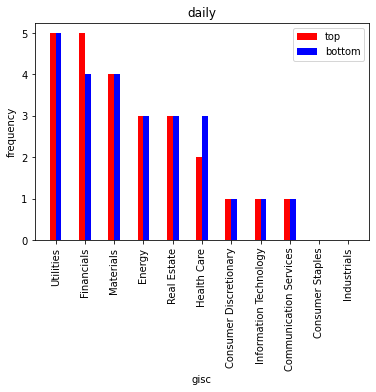

In [11]:
top_25 = dict(top_gain_loss_daily["GICS"].head(25).value_counts())
bottom_25 = dict(top_gain_loss_daily["GICS"].tail(25).value_counts())
labels = set(list(top_25.keys()) + list(bottom_25.keys()))
# print(labels)
# print(top_25)
# print(bottom_25)
for lab in labels:
    if lab in top_25:
        pass
    else:
        top_25[lab] = 0
    if lab in bottom_25:
        pass
    else:
        bottom_25[lab] = 0
# print(top_25)
# print(bottom_25)
w = 0.2
ind = np.arange(len(labels))
ind2 = [i+w for i in ind]
plt.bar(ind,top_25.values(),w,color="r",label="top")
plt.bar(ind2,bottom_25.values(),w,color="b",label="bottom")
plt.xlabel("gisc")
plt.ylabel("frequency")
plt.xticks(ind+w/2,labels,rotation=90)
plt.title("daily")
plt.legend()

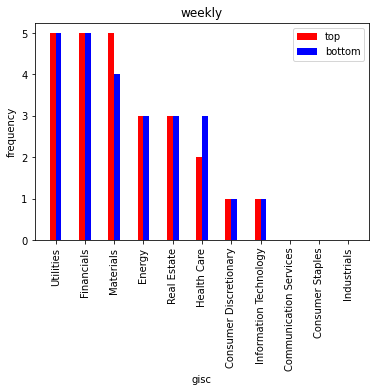

In [12]:
top_25 = dict(top_gain_loss_weekly["GICS"].head(25).value_counts())
bottom_25 = dict(top_gain_loss_weekly["GICS"].tail(25).value_counts())
labels = set(list(top_25.keys()) + list(bottom_25.keys()))
labels
for lab in labels:
    if lab in top_25:
        pass
    else:
        top_25[lab] = 0
    if lab in bottom_25:
        pass
    else:
        bottom_25[lab] = 0
        # top,bottom
w = 0.2
ind = np.arange(len(labels))
ind2 = [i+w for i in ind]
plt.bar(ind,top_25.values(),w,color="r",label="top")
plt.bar(ind2,bottom_25.values(),w,color="b",label="bottom")
plt.xlabel("gisc")
plt.ylabel("frequency")
plt.xticks(ind+w/2,labels,rotation=90)
plt.title("weekly")
plt.legend()

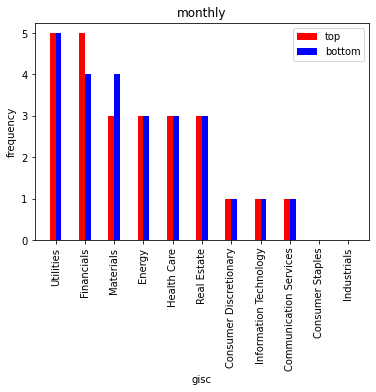

In [13]:
top_25 = dict(top_gain_loss_monthly["GICS"].head(25).value_counts())
bottom_25 = dict(top_gain_loss_monthly["GICS"].tail(25).value_counts())
labels = set(list(top_25.keys()) + list(bottom_25.keys()))
labels
for lab in labels:
    if lab in top_25:
        pass
    else:
        top_25[lab] = 0
    if lab in bottom_25:
        pass
    else:
        bottom_25[lab] = 0
        # top,bottom
w = 0.2
ind = np.arange(len(labels))
ind2 = [i+w for i in ind]
plt.bar(ind,top_25.values(),w,color="r",label="top")
plt.bar(ind2,bottom_25.values(),w,color="b",label="bottom")
plt.xlabel("gisc")
plt.ylabel("frequency")
plt.xticks(ind+w/2,labels,rotation=90)
plt.title("monthly")
plt.legend()

In [14]:
import base64


def spark_line(data, figsize=(4, 0.25), **kwags):
    """
    Returns a HTML image tag containing a base64 encoded sparkline style plot
    """
    data = list(data)

    fig, ax = plt.subplots(1, 1, figsize=figsize, **kwags)
    ax.plot(data)
    for k,v in ax.spines.items():
        v.set_visible(False)
    ax.set_xticks([])
    ax.set_yticks([])

    plt.plot(len(data) - 1, data[len(data) - 1], 'r.')

    ax.fill_between(range(len(data)), data, len(data)*[min(data)], alpha=0.1)

    img = io.BytesIO()
    plt.savefig(img, transparent=True, bbox_inches='tight')
    img.seek(0)
    plt.close()

    return base64.b64encode(img.read()).decode("UTF-8")

In [15]:
top_four = list()
top_2 = top_gain_loss_daily.head(2)
for sym in top_2["symbol"]:
    tsym = daily_samp[sym].sort_values().index[0]
    top_four.append(sym)
    top_four.append(tsym)
all_values = list()
for num in top_four:
    val = list(daily_dfs[num]["Gain/Loss"].dropna().values)
    all_values.append(val)
with open("spark1.html", "a") as file:
        file.write('<div>Daily top</div>')
        for value in all_values:
            file.write('<div><img src="data:image/png;base64,{}"/></div>'.format(spark_line(value)))
        file.write('<div></div>')

bottom_four = list()
bottom_2 = top_gain_loss_daily.tail(2)
for sym in bottom_2["symbol"]:
    tsym = daily_samp[sym].sort_values().index[0]
    bottom_four.append(sym)
    bottom_four.append(tsym)
all_values = list()
for num in bottom_four:
    val = list(daily_dfs[num]["Gain/Loss"].dropna().values)
    all_values.append(val)
with open("spark1.html", "a") as file:
        file.write('<div>Daily bottom</div>')
        for value in all_values:
            file.write('<div><img src="data:image/png;base64,{}"/></div>'.format(spark_line(value)))
        file.write('<div></div>')

In [16]:
top_four = list()
top_2 = top_gain_loss_weekly.head(2)
for sym in top_2["symbol"]:
    tsym = weekly_samp[sym].sort_values().index[0]
    top_four.append(sym)
    top_four.append(tsym)
all_values = list()
for num in top_four:
    val = list(weekly_dfs[num]["Gain/Loss"].dropna().values)
    all_values.append(val)
with open("spark1.html", "a") as file:
        file.write('<div>Weekly top</div>')
        for value in all_values:
            file.write('<div><img src="data:image/png;base64,{}"/></div>'.format(spark_line(value)))
        file.write('<div></div>')

bottom_four = list()
bottom_2 = top_gain_loss_weekly.tail(2)
for sym in bottom_2["symbol"]:
    tsym = weekly_samp[sym].sort_values().index[0]
    bottom_four.append(sym)
    bottom_four.append(tsym)
all_values = list()
for num in bottom_four:
    val = list(weekly_dfs[num]["Gain/Loss"].dropna().values)
    all_values.append(val)
with open("spark1.html", "a") as file:
        file.write('<div>Weekly bottom</div>')
        for value in all_values:
            file.write('<div><img src="data:image/png;base64,{}"/></div>'.format(spark_line(value)))
        file.write('<div></div>')

In [17]:
top_four = list()
top_2 = top_gain_loss_monthly.head(2)
for sym in top_2["symbol"]:
    tsym = monthly_samp[sym].sort_values().index[0]
    top_four.append(sym)
    top_four.append(tsym)
all_values = list()
for num in top_four:
    val = list(monthly_dfs[num]["Gain/Loss"].dropna().values)
    all_values.append(val)
with open("spark1.html", "a") as file:
        file.write('<div>Monthly top</div>')
        for value in all_values:
            file.write('<div><img src="data:image/png;base64,{}"/></div>'.format(spark_line(value)))
        file.write('<div></div>')

bottom_four = list()
bottom_2 = top_gain_loss_monthly.tail(2)
for sym in bottom_2["symbol"]:
    tsym = monthly_samp[sym].sort_values().index[0]
    bottom_four.append(sym)
    bottom_four.append(tsym)
all_values = list()
for num in bottom_four:
    val = list(monthly_dfs[num]["Gain/Loss"].dropna().values)
    all_values.append(val)
with open("spark1.html", "a") as file:
        file.write('<div>Monthly bottom</div>')
        for value in all_values:
            file.write('<div><img src="data:image/png;base64,{}"/></div>'.format(spark_line(value)))
        file.write('<div></div>')

In [18]:
pip install pdfcrowd

Note: you may need to restart the kernel to use updated packages.


In [19]:
import pdfcrowd

client = pdfcrowd.HtmlToPdfClient('demo', 'ce544b6ea52a5621fb9d55f8b542d14d')
client.convertFileToFile('spark1.html', 'spark1.pdf')